In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
nyc = pd.read_csv('C:/Users/Александр/Projects/projects/NYC_rides/NYC_dataset.csv')

Написать функцию haversine для подсчета расстояния между пунктами отправления и прибытия и,
используя  pd.iterrows(), создать колонку distance с подсчитанным расстоянием.
 φ1 и φ2 — широта исходного местоположения и широта пункта назначения в радианах, 
 λ1 и λ2 — долгота исходного местоположения и долгота пункта назначения в радианах,
 r — радиус сферы, будем считать его равным 6371.

In [4]:
nyc.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
# f1 - pickup_latitude
# f2 - dropoff_latitude
# l1 - pickup_longitude
# l2 - dropoff_longitude
def haversine(l1, f1, l2, f2, radius=6371.):
    f1, f2, l1, l2 = map(np.radians, [f1, f2, l1, l2])
    diff_lon = l2 - l1 
    diff_lat = f2 - f1
    
    a = np.sin(diff_lat/2.0)**2 + np.cos(f1) * np.cos(f2) * np.sin(diff_lon/2.0) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    
    return radius * c

In [6]:
%%time
nyc['distance'] = pd.Series(haversine(row.pickup_longitude,
                                      row.pickup_latitude,
                                      row.dropoff_longitude,
                                      row.dropoff_latitude) for i, row in nyc.iterrows())

CPU times: total: 3.03 s
Wall time: 3.05 s


Давайте попробуем еще один метод, pd.itertuples, который на каждой итерации возвращает 
именованный кортеж (named tuple) для каждой строки датафрейма. 
Параметр index по умолчанию равен True, поэтому первым элементом кортежа следует индекс, далее — содержимое строки. 

Обратите внимание, что, в отличие от первого метода, строка возвращается уже не как Series:

In [8]:
for row in nyc[:1].itertuples(name='ride'):  # исп. "ride" как название
    print(f"Тип содержимого: {type(row)}")

Тип содержимого: <class 'pandas.core.frame.ride'>


In [9]:
# Посмотрим на формат вывода:

for row in nyc[:3].itertuples(name='custom_name'):
    print(row)
    print()

custom_name(Index=0, key='2009-06-15 17:26:21.0000001', fare_amount=4.5, pickup_datetime='2009-06-15 17:26:21 UTC', pickup_longitude=-73.844311, pickup_latitude=40.721319, dropoff_longitude=-73.84161, dropoff_latitude=40.712278000000005, passenger_count=1, distance=1.030763935048818)

custom_name(Index=1, key='2010-01-05 16:52:16.0000002', fare_amount=16.9, pickup_datetime='2010-01-05 16:52:16 UTC', pickup_longitude=-74.016048, pickup_latitude=40.711303, dropoff_longitude=-73.979268, dropoff_latitude=40.782004, passenger_count=1, distance=8.450133595805992)

custom_name(Index=2, key='2011-08-18 00:35:00.00000049', fare_amount=5.7, pickup_datetime='2011-08-18 00:35:00 UTC', pickup_longitude=-73.982738, pickup_latitude=40.76127, dropoff_longitude=-73.991242, dropoff_latitude=40.750562, passenger_count=2, distance=1.3895252257697308)



In [10]:
# Индекс и число пассажиров для первых трех наблюдений:

for row in nyc[:3].itertuples():
    print("Индекс {}; Число пассажиров: {}".format(row.Index, row.passenger_count))

Индекс 0; Число пассажиров: 1
Индекс 1; Число пассажиров: 1
Индекс 2; Число пассажиров: 2


Задача: проделайте ту же операцию, что и в предыдущем шаге, но уже используя pd.itertuples(), 
а затем сравните время выполнения.

In [11]:
def haversine(l1, f1, l2, f2, radius=6371.):
    f1, f2, l1, l2 = map(np.radians, [f1, f2, l1, l2])
    diff_lon = l2 - l1 
    diff_lat = f2 - f1
    
    a = np.sin(diff_lat/2.0)**2 + np.cos(f1) * np.cos(f2) * np.sin(diff_lon/2.0) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    
    return radius * c

In [12]:
%%time
nyc['distance'] = pd.Series(haversine(x.pickup_longitude,
                                      x.pickup_latitude,
                                      x.dropoff_longitude,
                                      x.dropoff_latitude) for x in nyc.itertuples())

CPU times: total: 578 ms
Wall time: 582 ms


Еще один часто используемый метод pd.apply() применяет заданную функцию вдоль определенной
оси (axis=0 – строки; axis=1 – столбцы), и является более эффективным способом, чем pd.iterrows() 
за счет использования внутренних оптимизаций в pandas. 
Тем не менее, все равно подразумевает итерацию по всем рядам.

In [13]:
%%time
nyc['distance'] = nyc[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']] \
                 .apply(lambda x: haversine(x[0], x[1], x[2], x[3]), axis=1)

CPU times: total: 1.02 s
Wall time: 1.03 s


In [14]:
%%time
nyc['distance'] = nyc.apply(lambda x: haversine(x.pickup_longitude,
                                                x.pickup_latitude, 
                                                x.dropoff_longitude, 
                                                x.dropoff_latitude), axis=1)

CPU times: total: 1.78 s
Wall time: 1.77 s


In [15]:
%%time
nyc['distance'] = nyc.apply(lambda x: haversine(x['pickup_longitude'], 
                                                x['pickup_latitude'],
                                                x['dropoff_longitude'], 
                                                x['dropoff_latitude']), axis=1)

CPU times: total: 1.28 s
Wall time: 1.28 s


В переменную longest сохраните самое большое расстояние

In [16]:
longest = nyc.distance.max()
longest

8667.818812217454

В целом, itertuples — это именно то, что нам нужно! Но есть пара моментов.
Оказывается, в нашем случае itertuples — не предел. На всех предыдущих шагах мы использовали циклы, что не очень хорошо.
Почему же?
Базовые объекты в pandas — Series и DataFrame, которые представляют собой одномерные и двумерные массивы (arrays) 
соответственно. Так, векторизация — процесс выполнения операций над массивами. 
В pandas есть довольно большой набор векторизованных функций, и их использование во многих случаях предпочтительнее 
обычных циклов, поскольку они предназначены для работы именно с Series. К таким функциям относятся, например, sum и agg. 
С помощью векторизации можно получить ещё большее ускорение, значительно уменьшив количество итераций. 
Иными словами, действия будут происходят сразу над всей серией, а не над каждым элементом по отдельности.

Изменения в коде весьма незначительны: передаем функции на вход необходимые колонки, и получается магия!

In [15]:
# df['distance'] = haversine(df['col1'], df['col2'], df['col3'], df['col4'])

Убедимся, что векторизованные операции работают намного быстрее. 
Создадим функцию для подсчета расстояния haversine, описанную в первом шаге, и применим её к датасету nyc. 
Результат сохраним в колонку distance.  

In [16]:
%%time
nyc['distance'] = haversine(nyc.pickup_longitude,
                            nyc.pickup_latitude,
                            nyc.dropoff_longitude,
                            nyc.dropoff_latitude)

CPU times: total: 31.2 ms
Wall time: 5.98 ms


В предыдущем шаге мы передавали функции колонки формата Series, с чем связаны дополнительные вычислительные затраты, например, индексирование и проверка типа данных. Чтобы этого избежать, в качестве аргументов функции можно передать всё те же необходимые колонки, дополнительно указав .values, чтобы из Series получить массив NumPy (numpy array). В таком случае действия будут выполняться непосредственно над ndarrays. Такой способ можно использовать, когда отсутствие индексов и пр. не приведет к нарушению работы применяемой функции. 

df['distance'] = haversine(df['col1'].values, df['col2'].values, df['col3'].values, df['col4'].values)


In [20]:
# Как выглядят данные такого формата? 

nyc.pickup_longitude.values

array([-73.844311, -74.016048, -73.982738, ..., -74.002698, -73.946062,
       -73.932603])

Создайте функцию для подсчета расстояния haversine, описанную в первом степе, и примените её к датасету nyc. Результат сохраните в колонку distance.

In [21]:
%%time
nyc['distance'] = haversine(nyc.pickup_longitude.values, 
                            nyc.pickup_latitude.values, 
                            nyc.dropoff_longitude.values, 
                            nyc.dropoff_latitude.values)

CPU times: total: 15.6 ms
Wall time: 2.99 ms


In [24]:
nyc.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


Мы значительно ускорили выполнение кода, при этом изменив всего несколько строк и не изменяя код функции для подсчета расстояния. Получилось, что векторизованные операции над numpy arrays даже более эффективны, чем операции с Series.

Давайте подробнее посмотрим на информацию о самой длинной поездке в датасете nyc с 50 000 наблюдений.

In [27]:
nyc.iloc[nyc.distance.idxmax()]

key                  2012-05-12 10:48:00.00000020
fare_amount                                  49.8
pickup_datetime           2012-05-12 10:48:00 UTC
pickup_longitude                       -74.014917
pickup_latitude                         40.713382
dropoff_longitude                             0.0
dropoff_latitude                              0.0
passenger_count                                 1
distance                              8667.818812
Name: 48996, dtype: object

Как вы уже заметили, произошло что-то странное: в качестве широты и долготы стоят нулевые значения, а расстояние — целых 8667 км! Неужели наш пассажир действительно уехал так далеко?

Посмотрим, есть ли еще кейсы, где в качестве хотя бы одной из координат пункта назначения стоят нули, и в качестве ответа укажем количество таких случаев.

In [28]:
nyc.query("(dropoff_longitude == 0) | (dropoff_latitude == 0)").shape[0]

958

Что же там находится? Null Island! Координаты этого объекта часто используются в картографических системах для отслеживания ошибок.

Предположим, наша цель всё ещё состоит в поиске самых дальних поездок. Естественно, текущие данные совсем не годятся — некоторые такси, согласно данным, уезжают и приезжают из океана.
Постройте графики распределения переменных pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude, и для каждой переменной выберите только один наиболее подходящий вариант для дальнейшей фильтрации данных

C:\Users\Александр\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Александр\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Александр\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit 

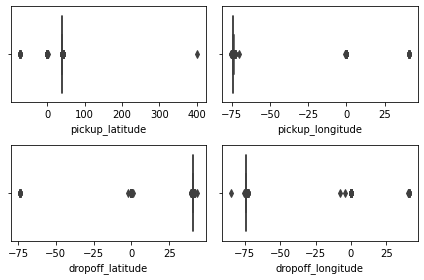

In [30]:
fig, axes = plt.subplots(ncols=2, nrows=2)
sns.boxplot(nyc.pickup_latitude, ax=axes.flatten()[0])
sns.boxplot(nyc.pickup_longitude, ax=axes.flatten()[1])
sns.boxplot(nyc.dropoff_latitude, ax=axes.flatten()[2])
sns.boxplot(nyc.dropoff_longitude, ax=axes.flatten()[3])
plt.tight_layout()

Решение:
    
10 < pickup_latitude < 120, 
pickup_longitude < -60, 
10 < dropoff_latitude, 
dropoff_longitude < -60, 

Критерии для фильтрации выбраны, остался последний шаг: отфильтровать имеющиеся данные и наконец-то найти самую дальнюю поездку.

Для фильтрации используем условия из предыдущего степа, а также добавим еще одно ограничение для переменной distance. Предположим, максимальная удаленность пунктов друг от друга не должна превышать 50 километров, иначе такой заказ не будет принят системой, а наличие подобных результатов в таблице будет считаться ошибкой.

В качестве ответа укажем сумму, которую заплатил пассажир, проехавший наибольшее расстояние.

In [33]:
nyc_filtered = (nyc.query("(pickup_longitude < -60) and (pickup_latitude < 120) and (pickup_latitude > 10) and (dropoff_latitude > 10) and (dropoff_longitude < -60) and (distance < 50)") \
                   .reset_index(drop=True))

In [35]:
nyc_filtered.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [36]:
longest_filtered =  nyc_filtered.distance.idxmax()
longest_filtered

32795

In [38]:
nyc_filtered.loc[longest_filtered].fare_amount

136.0

Либо через query, выбрав строки датафрейма, где distance равен максимальному. Этот вариант может быть предпочтительнее в случаях,
когда несколько пассажиров проехали абсолютно одинаковое расстояние (idxmax вернул бы только один индекс).

In [40]:
nyc_filtered.query("distance == @nyc_filtered.distance.max()")

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
32795,2014-02-22 02:44:00.00000052,136.0,2014-02-22 02:44:00 UTC,-73.98954,40.757032,-73.86058,41.147487,1,44.746988


In [41]:
nyc_filtered.query("distance == @nyc_filtered.distance.max()").fare_amount

32795    136.0
Name: fare_amount, dtype: float64